In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sym
import pandas as pd

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [127]:
def expfunction(x,A,B,C):
    return A*np.exp(-B*x)+C

def expfunction2(x,A,B):
    return A*np.exp(-B*x)

In [128]:
DataFrame1 = pd.read_csv('24-10-15-11-21.data', usecols=[0], names=['time_rawdata'], sep=' ')
DataFrame1 = DataFrame1[DataFrame1['time_rawdata'] < 40000]

In [129]:
times_rawdata1 = DataFrame1['time_rawdata']/1000

In [130]:
len(times_rawdata1)

2066

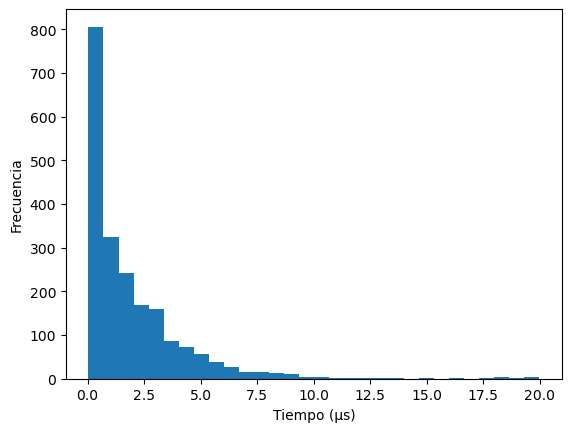

In [220]:
plt.hist(times_rawdata1, bins=30)
plt.ylabel("Frecuencia")
plt.xlabel("Tiempo (μs)")
plt.show()

In [132]:
F1, N1 = np.histogram(times_rawdata1, bins=30)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19756\3952923982.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)+C


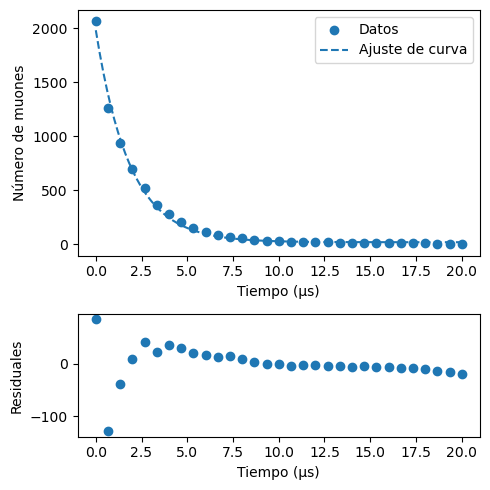

In [229]:
fig, ax = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2, 1]})

time_fit1 = np.linspace(0,20,31)
time_graph1 = np.linspace(0,20,100)
muon_graph1 = np.array([len(times_rawdata1)]) 

for i in range(0, len(F1)):
    muon_graph1 = np.append(muon_graph1, muon_graph1[i] - F1[i])
    
params1, pcov1 = scipy.optimize.curve_fit(expfunction, time_fit1, muon_graph1)

residuals1 = muon_graph1 - expfunction(time_fit1,*params1)
    
ax[0].scatter(time_fit1,muon_graph1,label="Datos")
ax[0].plot(time_graph1, expfunction(time_graph1,*params1),linestyle="--",label="Ajuste de curva")
ax[0].set_xlabel("Tiempo (μs)")
ax[0].set_ylabel("Número de muones")
ax[0].legend()

ax[1].scatter(time_fit1, residuals1)
ax[1].set_ylabel("Residuales")
ax[1].set_xlabel("Tiempo (μs)")
plt.tight_layout()

plt.show()

In [226]:
params1, np.sqrt(np.diag(pcov1))

(array([1.96134937e+03, 5.40501543e-01, 2.08229466e+01]),
 array([2.97686088e+01, 1.54431882e-02, 7.59396249e+00]))

In [154]:
tau_obs = 1/params1[1]
tau_obs

1.8501334778223126

In [155]:
muon_graph1_corrected = muon_graph1 - params1[2]

In [156]:
muon_graph1_corrected

array([ 2.04517705e+03,  1.23917705e+03,  9.15177053e+02,  6.73177053e+02,
        5.05177053e+02,  3.46177053e+02,  2.60177053e+02,  1.87177053e+02,
        1.30177053e+02,  9.21770534e+01,  6.61770534e+01,  5.11770534e+01,
        3.51770534e+01,  2.11770534e+01,  1.11770534e+01,  7.17705339e+00,
        2.17705339e+00,  1.17705339e+00,  1.77053386e-01, -1.82294661e+00,
       -3.82294661e+00, -4.82294661e+00, -4.82294661e+00, -6.82294661e+00,
       -6.82294661e+00, -8.82294661e+00, -8.82294661e+00, -9.82294661e+00,
       -1.38229466e+01, -1.58229466e+01, -2.08229466e+01])

In [214]:
params2, pcov2 = scipy.optimize.curve_fit(expfunction2, time_fit1, muon_graph1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19756\3952923982.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)


In [215]:
params2

array([1.96930599e+03, 5.18967377e-01])

In [216]:
1/5.18967e-01

1.926904793561055

In [217]:
rho = sym.symbols("rho",real=True)
tau_plus = 2.1969
tau_minus = 2.043
eq = sym.Eq(1.996, (1+rho)*tau_minus*tau_plus/(rho*tau_minus + tau_plus))

In [218]:
sym.solve(eq,rho)

[-0.251570575581689]

In [196]:
hbarra = 6.582119569e-25 #GeV
m = 0.10566 #GeV

In [199]:
np.sqrt(192*np.pi**3*hbarra/(m**5*tau_obs*1e-6))

1.2681781326445635e-05